Bohao Hu #33131277 Leanne Su #55285753 Grady Chen #18865568

Largest Magnitude: 9.1
 Date/Time: 2011-03-11 05:46:23
 Latitude:38.2963
 Longitude: 142.498
 Depths: 19.7


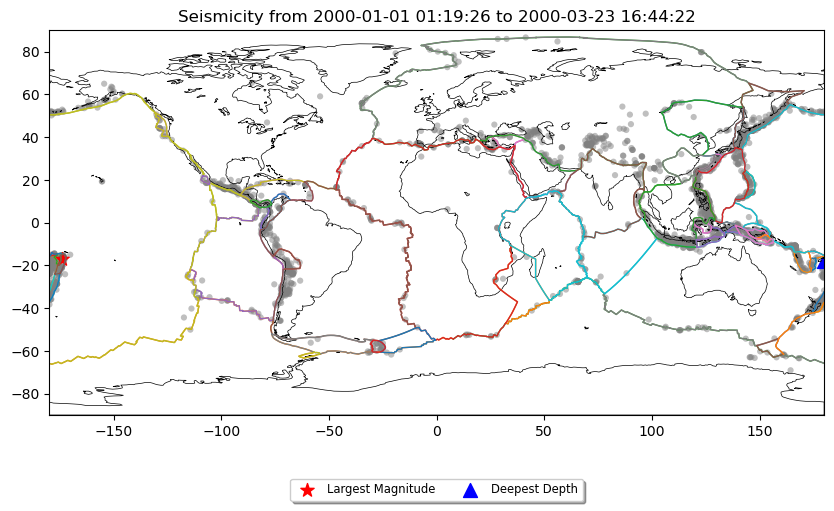

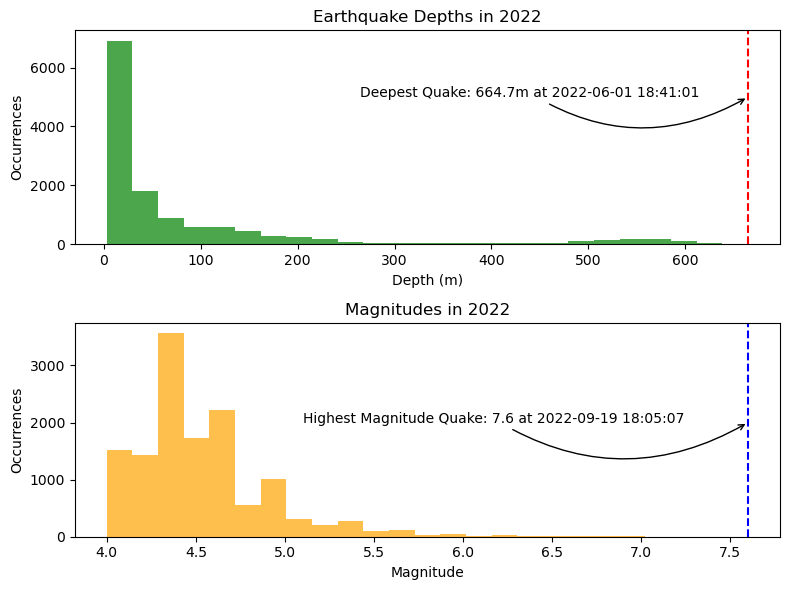

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import earthquake_fns as eq

# C1

longitudes, latitudes = eq.get_coastlines("./m_coasts.csv")
pb_dict = eq.get_plate_boundaries("./all_boundaries.csv")
earthquakes = eq.get_earthquakes("./IRIS_eq_010100_112422_mag4.csv")
lats, lons, depths, magnitudes, times = eq.parse_earthquakes_to_np(earthquakes)

largest_magnitude_index = np.argmax(magnitudes)
largest_magnitude = {
    'magnitude': magnitudes[largest_magnitude_index],
    'date/time': times[largest_magnitude_index],
    'latitude': lats[largest_magnitude_index],
    'longitude': lons[largest_magnitude_index] ,
    'depth': depths[largest_magnitude_index],
}

print(f"Largest Magnitude: {largest_magnitude['magnitude']}\n", 
      f"Date/Time: {largest_magnitude['date/time']}\n",
      f"Latitude:{largest_magnitude['latitude']}\n",
      f"Longitude: {largest_magnitude['longitude']}\n",
      f"Depths: {largest_magnitude['depth']}")

# C2

last_2500_lats = lats[-2500:]
last_2500_lons = lons[-2500:]
last_2500_depths = depths[-2500:]
last_2500_magnitudes = magnitudes[-2500:]
last_2500_times = times[-2500:]

largest_magnitude_index_2 = np.argmax(last_2500_magnitudes)
deepest_depth_index = np.argmax(last_2500_depths)

largest_magnitude_lat = last_2500_lats[largest_magnitude_index_2]
largest_magnitude_lon = last_2500_lons[largest_magnitude_index_2]

deepest_depth_lat = last_2500_lats[deepest_depth_index]
deepest_depth_lon = last_2500_lons[deepest_depth_index]

start_date = last_2500_times.min().strftime('%Y-%m-%d %H:%M:%S')
end_date = last_2500_times.max().strftime('%Y-%m-%d %H:%M:%S')

fig, ax = plt.subplots(figsize=(10, 5))


ax.plot(longitudes, latitudes, color='black', linewidth=0.5)

broken_lines = eq.break_line_at_boundary(pb_dict) #for plate boundaries

for line_segment in broken_lines:
    ax.plot(line_segment[:, 0], line_segment[:, 1], linewidth=1)

ax.scatter(last_2500_lons, last_2500_lats, c='gray', s=20, edgecolors='none', alpha=0.5) #earthquake locations

ax.scatter(largest_magnitude_lon, largest_magnitude_lat, c='red', marker='*', s=100, label='Largest Magnitude') 
ax.scatter(deepest_depth_lon, deepest_depth_lat, c='blue', marker='^', s=100, label='Deepest Depth')
plt.title(f"Seismicity from {start_date} to {end_date}")
plt.legend(fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)

# C3

earthquakes['Year'] = [date.year for date in times]
df_2022 = earthquakes[(earthquakes['Year'] == 2022)]
lats_2022, lons_2022, depths_2022, mags_2022, times_2022 = eq.parse_earthquakes_to_np(df_2022)

deepest_quake = np.max(depths_2022)
deepest_quake_indice = np.argmax(depths_2022)
deepest_quake_time = times_2022[deepest_quake_indice]

largest_quake = np.max(mags_2022)
largest_quake_indice = np.argmax(mags_2022)
largest_quake_time = times_2022[largest_quake_indice]

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

ax[0].hist(depths_2022, bins= 25, color='green', alpha = 0.7)
ax[0].axvline(x = deepest_quake, color='red', linestyle='--')

ax[0].annotate(f'Deepest Quake: {deepest_quake}m at {deepest_quake_time}', xy=(deepest_quake, 5000), xytext=(deepest_quake - 400, 5000),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.3'))

ax[0].set_title('Earthquake Depths in 2022')
ax[0].set_xlabel('Depth (m)')
ax[0].set_ylabel('Occurrences')


ax[1].hist(mags_2022, bins = 25, color='orange', alpha = 0.7)

ax[1].axvline(x = largest_quake, color='blue', linestyle='--')

ax[1].annotate(f'Highest Magnitude Quake: {largest_quake} at {largest_quake_time}', xy=(largest_quake, 2000), xytext=(largest_quake - 2.5, 2000),
                 arrowprops=dict(facecolor='black', arrowstyle='->', connectionstyle='arc3,rad=0.3'))

ax[1].set_title('Magnitudes in 2022')
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Occurrences')

plt.tight_layout()